<a href="https://colab.research.google.com/github/Chanminii/Bank-Marketing-prediction/blob/main/mlcw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BANK DATA ANALYSIS


In [2]:
# Import libraries

## basic
import pandas as pd
import numpy as np
import warnings
## visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] =(10,10)
sns.set_theme(style="darkgrid")

# **Loading data**

In [3]:
# Load the dataset

df= pd.read_csv('bank-full.csv', delimiter =';') #delimiter converts the data into a stuctured format
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


observation:  

*   Dataset consists of Numerical and Categorical data
*   17 Features can be seen
*   'y' is the output
*   duration column should be deleted since duration can be only known after the label column is known (avoid 'data leakage')






In [4]:
# Check the shape of the data
df.shape

(45211, 17)

observation:

*   There are 45211 rows and 17 columns




In [5]:
# Drop 'duration' column
df = df.drop('duration', axis=1)

print('Shape of dataset',df.shape)
df.head()

Shape of dataset (45211, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


In [6]:
# Checking for duplicate rows in the dataset
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate rows:")
    print(duplicate_rows)

# Removing duplicate rows
df = df.drop_duplicates()
print(f"Dataset shape after removing duplicates: {df.shape}")


Number of duplicate rows: 16
Duplicate rows:
       age          job  marital  education default  balance housing loan  \
2871    44     services   single  secondary      no        0     yes   no   
4910    34   management   single   tertiary      no        0     yes   no   
12939   25  blue-collar  married    primary      no        0      no   no   
13662   47     services  married  secondary      no        0     yes   no   
15836   35   management  married   tertiary      no        0     yes   no   
21522   47   technician  married  secondary      no        0      no   no   
22157   31   management   single   tertiary      no        0      no   no   
22210   32   technician   single   tertiary      no        0      no   no   
22233   34   management   single   tertiary      no        0      no   no   
22418   30   technician   single   tertiary      no        0      no   no   
22445   32   management   single   tertiary      no        0      no   no   
22560   59      retired  marrie

In [7]:
df.describe()

,age,balance,day,campaign,pdays,previous
count,45195.000000,45195.000000,45195.000000,45195.000000,45195.000000,45195.000000
mean,40.937604,1362.754331,15.804824,2.763978,40.212413,0.580529
std,10.619108,3045.196838,8.322816,3.098304,100.143468,2.303823
min,18.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,449.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


# Histogram plot

<function matplotlib.pyplot.show(close=None, block=None)>

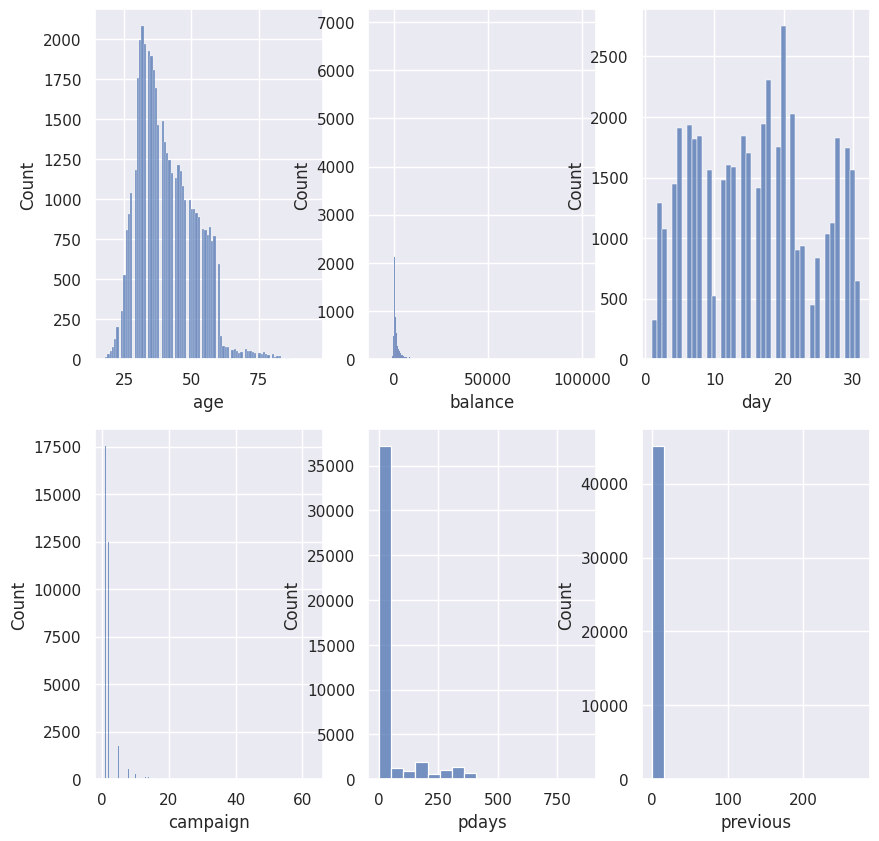

In [8]:
# plot histograms
fig, axes = plt.subplots(2,3)
sns.histplot(data=df, x='age', ax=axes[0,0])
sns.histplot(data=df, x='balance', ax=axes[0,1])
sns.histplot(data=df, x='day', ax=axes[0,2])
sns.histplot(data=df, x='campaign', ax=axes[1,0])
sns.histplot(data=df, x='pdays', ax=axes[1,1])
sns.histplot(data=df, x='previous', ax=axes[1,2])
plt.show


# Distribution plot

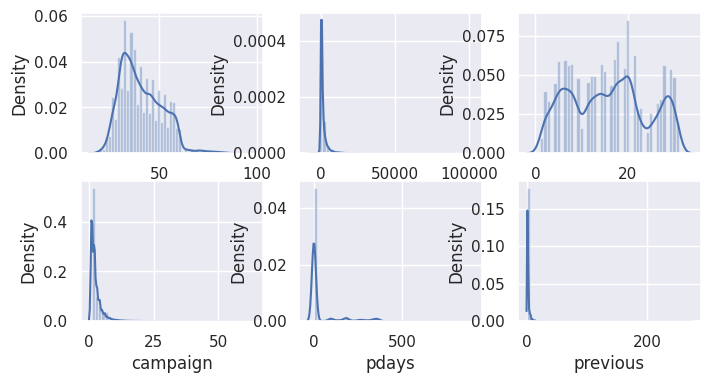

In [9]:
from pylab import *

# plot distribution plots
sns.set(rc={'figure.figsize': (8, 4)})
np.random.seed(0)

fig, axes = plt.subplots(2, 3)

subplot(2,3,1)
sns.distplot(df['age'])
subplot(2,3,2)
sns.distplot(df['balance'])
subplot(2,3,3)
sns.distplot(df['day'])
subplot(2,3,4)
sns.distplot(df['campaign'])
subplot(2,3,5)
sns.distplot(df['pdays'])
subplot(2,3,6)
sns.distplot(df['previous'])
plt.show()


# Box plot

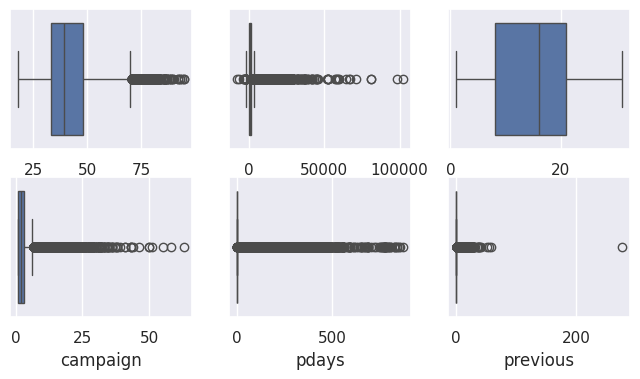

In [10]:
# plot boxplots
fig, axes = plt.subplots(2, 3)

sns.boxplot(data=df, x='age', ax=axes[0,0])
sns.boxplot(data=df, x='balance', ax=axes[0,1])
sns.boxplot(data=df, x='day', ax=axes[0,2])
sns.boxplot(data=df, x='campaign', ax=axes[1,0])
sns.boxplot(data=df, x='pdays', ax=axes[1,1])
sns.boxplot(data=df, x='previous', ax=axes[1,2])
plt.show()


# Class Distribution

y
no     39906
yes     5289
Name: count, dtype: int64


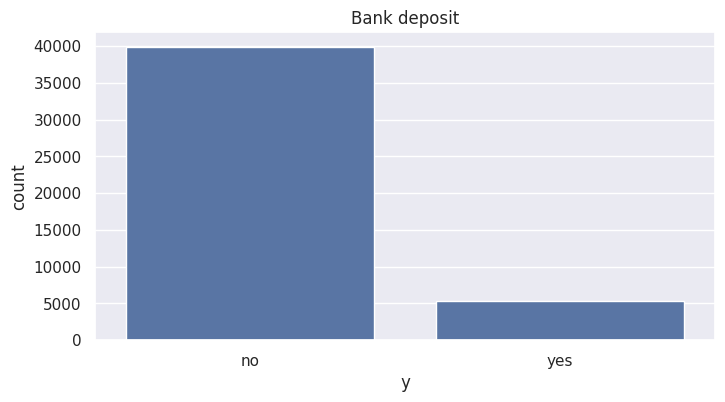

In [11]:
print(df.y.value_counts())
axes1 = sns.countplot(data=df, x='y')
plt.title("Bank deposit")
plt.show()

In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

observation:

*   There are 16 features
*   which are : age , job , marital, education, default, balance, housing, loan, contact, day, month, campaign, pdays, previous, poutcome, y



In [13]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


Observation:


*   Numerical data: age, balance, day, campaign, pdays, previous
*   Categorical data: job, marital, education, default, housing, loan, contact, month, poutcome, y



# Checking Missing Values

In [14]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


Observations:


*   No missing values in the given datset




# Correlation Plot (Heatmap)

,age,balance,day,campaign,pdays,previous
age,1.000000,0.097742,-0.009043,0.004770,-0.023816,0.001255
balance,0.097742,1.000000,0.004589,-0.014600,0.003370,0.016635
day,-0.009043,0.004589,1.000000,0.162463,-0.092981,-0.051670
campaign,0.004770,-0.014600,0.162463,1.000000,-0.088656,-0.032870
pdays,-0.023816,0.003370,-0.092981,-0.088656,1.000000,0.454802
previous,0.001255,0.016635,-0.051670,-0.032870,0.454802,1.000000


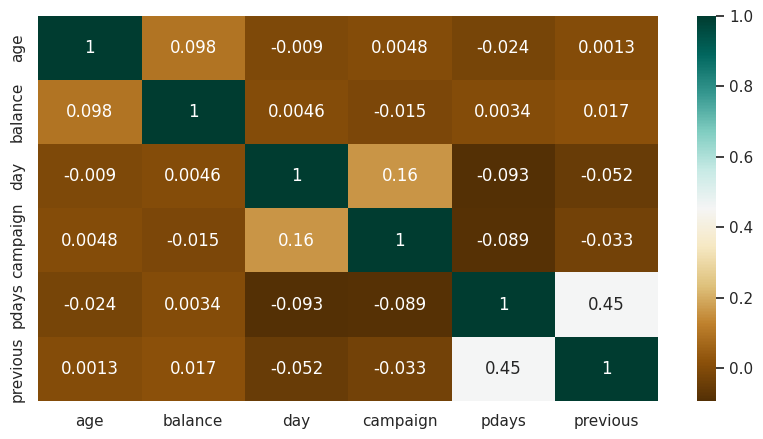

In [15]:
#plot heatmap
plt.figure(figsize=(10,5))
numerical_df = df.select_dtypes(include=np.number)
c= numerical_df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [16]:
#Standerdization of the datset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['age','balance','day','campaign','pdays','previous']
numerical_df[num_cols] = scaler.fit_transform(numerical_df[num_cols])

#numerical_df = numerical_df.drop('y', axis=1)
numerical_df.head()

,age,balance,day,campaign,pdays,previous
0,1.606781,0.256225,-1.298232,-0.569343,-0.411538,-0.251988
1,0.288389,-0.437991,-1.298232,-0.569343,-0.411538,-0.251988
2,-0.747491,-0.446858,-1.298232,-0.569343,-0.411538,-0.251988
3,0.570901,0.047040,-1.298232,-0.569343,-0.411538,-0.251988
4,-0.747491,-0.447186,-1.298232,-0.569343,-0.411538,-0.251988


In [17]:
#Encode categorical Features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
df_targ = df['y']

df_targ = df_targ.apply(lambda x: 1 if x=='yes' else 0)
df_targ.head(15)

,y
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [18]:
# Encode categorical features
#Onehot encoder method is used to encode categorical features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

catg_cols = ['job','marital','education','default','housing','loan','contact','month','poutcome']

df_catg = df.copy()
df_catg.head()

#Encode categorical Data to Numerical
encoded_df = pd.DataFrame(encoder.fit_transform(df_catg[catg_cols]))
encoded_df.columns = encoder.get_feature_names_out(catg_cols)

#Replace Categorical Data with Encoded Data
df_catg = df_catg.drop(catg_cols, axis=1)
df_catg = pd.concat([df_catg, encoded_df], axis=1)

print('Shape of the dataframe:', df_catg.shape)
df_catg.head()

Shape of the dataframe: (45211, 51)


,age,balance,day,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58.0,2143.0,5.0,1.0,-1.0,0.0,no,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44.0,29.0,5.0,1.0,-1.0,0.0,no,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33.0,2.0,5.0,1.0,-1.0,0.0,no,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47.0,1506.0,5.0,1.0,-1.0,0.0,no,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33.0,1.0,5.0,1.0,-1.0,0.0,no,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Split Dataset for Training and Testing

In [19]:
# Select features
feature = df_catg.drop('y', axis=1)

# Select target
target = df_catg['y']

#Set training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, target, shuffle = True, test_size=0.2, random_state=1)

#Show training and testing data
print('Shape of Training Features:', X_train.shape)
print('Shape of Testing Features:', X_test.shape)
print('Shape of Training Target:', y_train.shape)
print('Shape of Testing Target:', y_test.shape)

Shape of Training Features: (36168, 50)
Shape of Testing Features: (9043, 50)
Shape of Training Target: (36168,)
Shape of Testing Target: (9043,)


# Class imbalance Fixing

In [20]:
# Fix class imbalance
from imblearn.over_sampling import SMOTE

# Convert y_train and y_test to numerical format if they are not already
# Explicitly map 'no' to 0 and 'yes' to 1 for both y_train and y_test before SMOTE
if y_train.dtype == object:  # Check if y_train is of type object (string)
    y_train = y_train.map({'no': 0, 'yes': 1})  # Map 'no' to 0 and 'yes' to 1
if y_test.dtype == object:
    y_test = y_test.map({'no': 0, 'yes': 1})

# Drop rows with NaN in y_train and corresponding rows in X_train
X_train = X_train[y_train.notna()]  # Keep rows where y_train is not NaN
y_train = y_train[y_train.notna()]  # Keep corresponding y_train values

# Drop rows with NaN values in X_train
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Update y_train to match X_train after dropping rows

# Drop rows with NaN values in y_test and corresponding rows in X_test
X_test = X_test[y_test.notna()]  # Keep rows where y_test is not NaN
y_test = y_test[y_test.notna()]  # Keep corresponding y_test values

# Apply SMOTE on the cleaned data
smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Class distribution before SMOTE: Counter({0.0: 31983, 1.0: 4161})
Class distribution after SMOTE: Counter({0.0: 31983, 1.0: 31983})


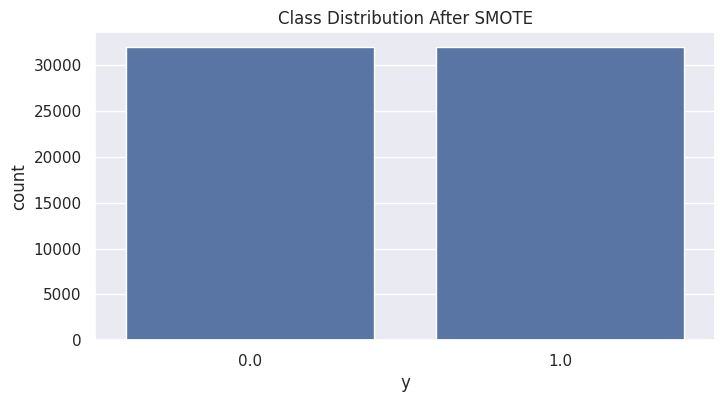

In [22]:
# Check class distribution before and after SMOTE
from collections import Counter

print("Class distribution before SMOTE:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_train_resampled))

sns.countplot(x=y_train_resampled)
plt.title("Class Distribution After SMOTE")
plt.show()

# Modelling

In [ ]:
# function to evaluate and calculate accuracy , precision , recall, F1- score and kappa score
def evaluate_model(model, X_test, y_test):
    from sklearn import metrics

    # Predict Test Data
    y_pred = model.predict(X_test)

    # Convert y_test and y_pred to numerical labels if they are strings
    if isinstance(y_test.iloc[0], str):  # Check if y_test contains strings
        y_test = y_test.map({'no': 0, 'yes': 1})  # Map 'no' to 0 and 'yes' to 1
    if isinstance(y_pred[0], str):
        y_pred = pd.Series(y_pred).map({'no': 0, 'yes': 1}).values  # Map 'no' to 0 and 'yes' to 1


    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate the area under the curve (AUC)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    # Visualization of Confusion matrix
    sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    return {'acc': acc, 'pre': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 'fpr':fpr, 'tpr': tpr, 'auc': auc, 'cm' : cm }


# Random Forest

In [ ]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Building a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

RandomForestClassifier(random_state=0)

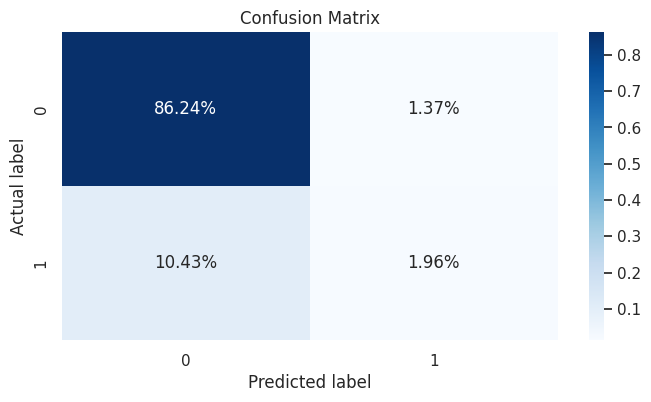

Accuracy: 0.8819690265486726
Precision: 0.5880398671096345
Recall: 0.15803571428571428
F1-score: 0.24912033779028853
Kappa score: 0.20752571560024968
Area Under Curve: 0.7662676429473304
Confusion Matrix:
 [[7796  124]
 [ 943  177]]


In [ ]:
# Evaluate Random Forest Model
rf_eval = evaluate_model(rf_model, X_test, y_test)
rf_eval

# print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['pre'])
print('Recall:', rf_eval['rec'])
print('F1-score:', rf_eval['f1'])
print('Kappa score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

# Neural Network

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
# Initialize and define the neural network model
nn_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Convert y_train and y_test to numerical format if they are not already
if y_train.dtype == object:  # Check if y_train is of type object (string)
    y_train = y_train.map({'no': 0, 'yes': 1})  # Map 'no' to 0 and 'yes' to 1
if y_test.dtype == object:
    y_test = y_test.map({'no': 0, 'yes': 1})

# Train the model
history = nn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/20
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8270 - loss: 1.8138 - val_accuracy: 0.8758 - val_loss: nan
Epoch 2/20
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8450 - loss: 1.1280 - val_accuracy: 0.8762 - val_loss: nan
Epoch 3/20
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8586 - loss: 0.8123 - val_accuracy: 0.8761 - val_loss: nan
Epoch 4/20
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8603 - loss: 0.8228 - val_accuracy: 0.8654 - val_loss: nan
Epoch 5/20
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8643 - loss: 0.6230 - val_accuracy: 0.8763 - val_loss: nan
Epoch 6/20
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8642 - loss: 0.6623 - val_accuracy: 0.8563 - val_loss: nan
Epoch 7/20
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8674 - loss: 0.6577 - val_accuracy: 0.8772 - val_loss: nan
Epoch 8/20
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8732 - loss: 0.5139 - val_accuracy: 0.8765 

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


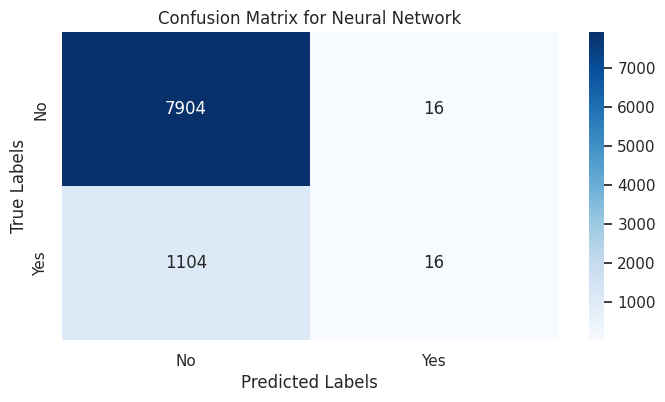

In [29]:
from sklearn.metrics import confusion_matrix
# Predict on the test set
nn_predictions = (nn_model.predict(X_test) > 0.5).astype(int)

# Convert y_test to numerical format if necessary
if y_test.dtype == object:
    y_test = y_test.map({'no': 0, 'yes': 1})

# Calculate the confusion matrix
cm = confusion_matrix(y_test, nn_predictions)

# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix for Neural Network')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Import necessary functions

nn_loss, nn_accuracy = nn_model.evaluate(X_test, y_test)
nn_predictions = (nn_model.predict(X_test) > 0.5).astype(int)
nn_precision = precision_score(y_test, nn_predictions)
nn_recall = recall_score(y_test, nn_predictions)
nn_f1 = f1_score(y_test, nn_predictions)

print("Neural Network Accuracy:", nn_accuracy)
print("Neural Network Precision:", nn_precision)
print("Neural Network Recall:", nn_recall)
print("Neural Network F1-Score:", nn_f1)

283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8820 - loss: nan
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Neural Network Accuracy: 0.8790929317474365
Neural Network Precision: 0.5685279187817259
Neural Network Recall: 0.1
Neural Network F1-Score: 0.170083523158694


# Comparison of Models

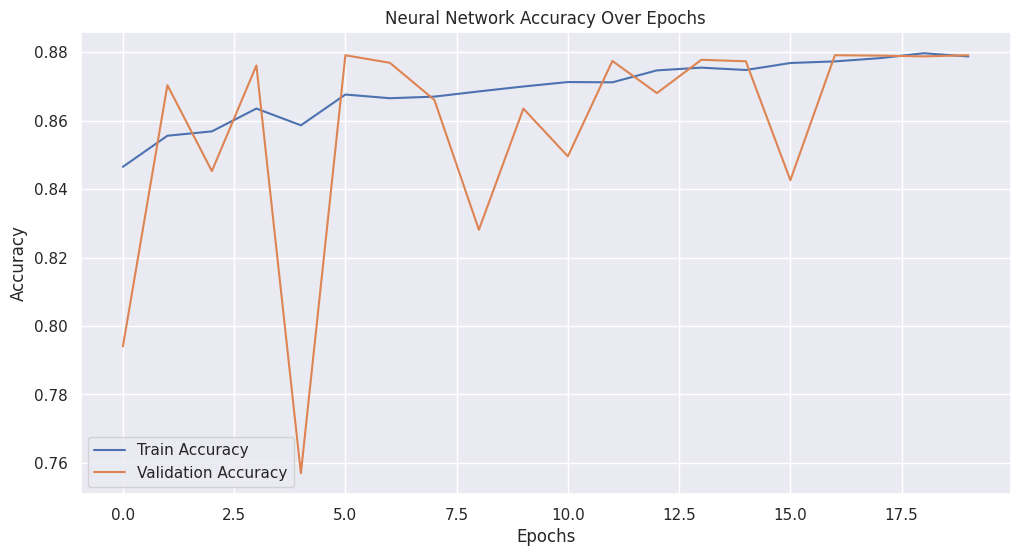

In [ ]:
# Visualization of Neural Network Training History
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Neural Network Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Observation:


* Training Accuracy: The blue line represents the training
accuracy over 20 epochs. It shows a steady improvement, indicating that the model is learning effectively from the training data.The gradual rise suggests that the model avoids overfitting during training.

*  Validation Accuracy: The orange line represents the validation accuracy, which exhibits some fluctuations across epochs. This behavior may be due to the stochastic nature of the training process or data splits.While there are significant dips in some epochs, the validation accuracy generally aligns closely with the training accuracy towards the later epochs. This indicates that the model generalizes reasonably well.

*  Convergence: By the end of training (around the 20th epoch), both training and validation accuracies converge to approximately 88%. This consistency highlights that the model is well-trained and avoids overfitting.






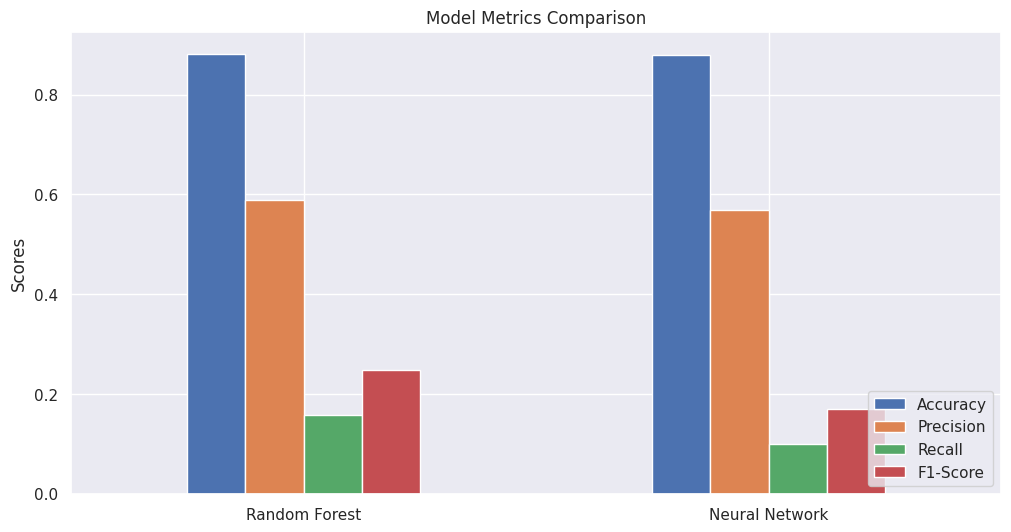

In [ ]:
# Bar plot for metric comparison
#Extract values from the rf_eval dictionary
rf_accuracy = rf_eval['acc']
rf_precision = rf_eval['pre']
rf_recall = rf_eval['rec']
rf_f1 = rf_eval['f1']

model_metrics = {
    'Random Forest': {'Accuracy': rf_accuracy, 'Precision': rf_precision, 'Recall': rf_recall, 'F1-Score': rf_f1},
    'Neural Network': {'Accuracy': nn_accuracy, 'Precision': nn_precision, 'Recall': nn_recall, 'F1-Score': nn_f1}
}

metrics_df = pd.DataFrame(model_metrics).T
metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Metrics Comparison')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

Observations:
*   Accuracy:
Both Random Forest and Neural Network models have high accuracy, close to or above 0.8, indicating good overall performance in correctly predicting outcomes.

*   Precision:
Precision is higher for the Neural Network compared to the Random Forest, suggesting that the Neural Network has fewer false positives relative to the number of true positives.


*   Recall:
The Random Forest has a higher recall than the Neural Network. This implies that the Random Forest is better at identifying true positives and minimizing false negatives.

*   F1-Score:
The F1-Score, which balances precision and recall, is higher for the Random Forest model. This indicates that the Random Forest has a better trade-off between precision and recall compared to the Neural Network.

*   General Observation:
The Random Forest seems to perform better in recall and F1-Score, making it a better choice if the problem emphasizes identifying as many positives as possible (e.g., in sensitive applications like healthcare).
The Neural Network performs slightly better in precision, which might be preferable in applications where false positives have a higher cost (e.g., fraud detection).









In [ ]:
# Displaying metrics for better comparison
print("\nModel Metrics Comparison:\n")
print(metrics_df)


Model Metrics Comparison:

                Accuracy  Precision    Recall  F1-Score
Random Forest   0.881969   0.588040  0.158036  0.249120
Neural Network  0.879093   0.568528  0.100000  0.170084
